In [1]:
from epengine.models.inference import (
    SBEMInferenceRequestSpec,
    SBEMInferenceSavingsRequestSpec,
)

/Users/daryaguettler/epengine/.venv/lib/python3.12/site-packages/archetypal/__init__.py:16: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


## Test cost and incentive integration - no solar

In [ ]:
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=500,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ASHPCooling",
        "Heating": "ASHPHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "LED",
        "Thermostat": "Controls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "DoublePaneLowE",
        "OnsiteSolar": "NoSolarPV",
    },
)

results_costs_check = savings_spec.run(n=10)
original_results_costs_check = results_costs_check["original"]
new_results_costs_check = results_costs_check["upgraded"]
delta_results_costs_check = results_costs_check["delta"]
retrofit_result_costs_check = results_costs_check["retrofit"]

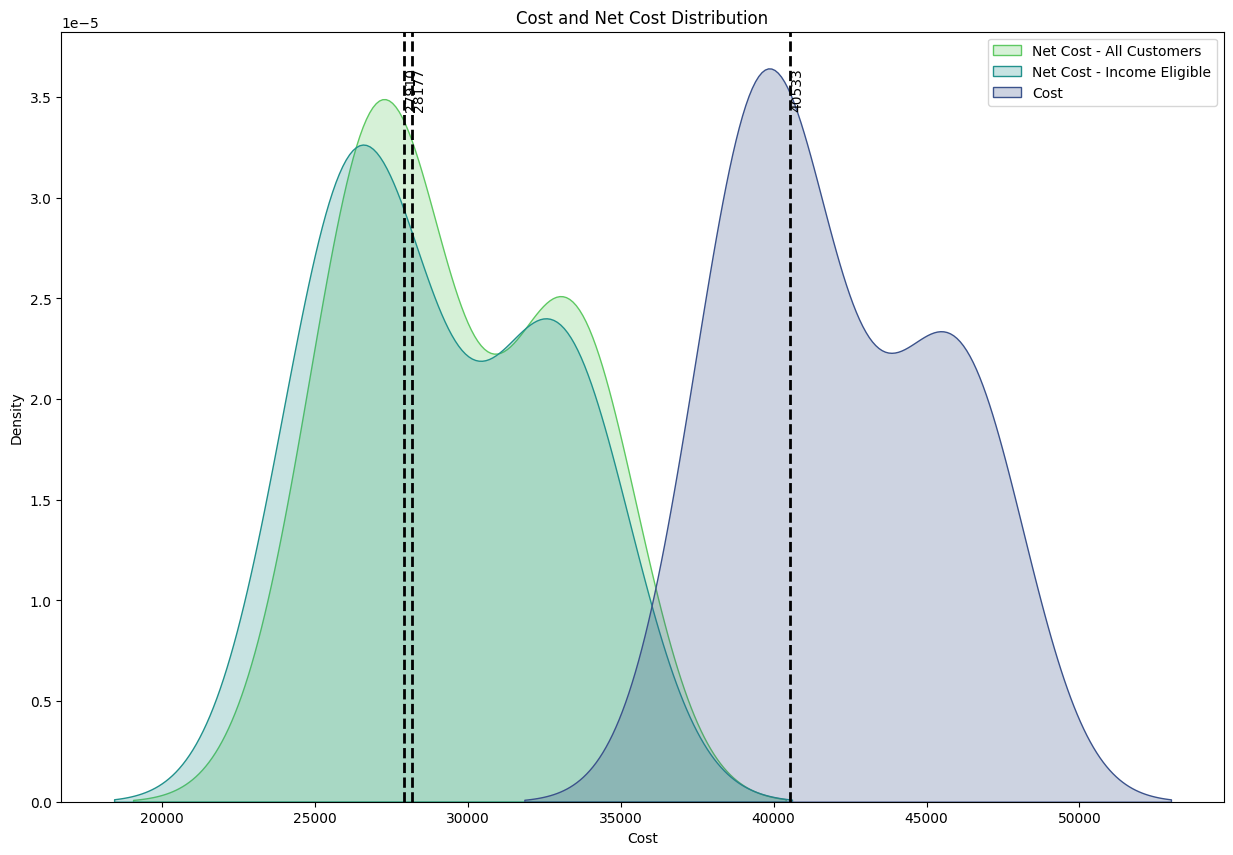

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all cost columns (excluding incentives) into a single Series for KDE plot
costs_total = retrofit_result_costs_check.costs[
    ["cost.Total", "net_cost.Total.IncomeEligible", "net_cost.Total.AllCustomers"]
]
plt.figure(figsize=(15, 10))
sns.kdeplot(costs_total, fill=True, palette="viridis", label="Total Cost")
for _i, col in enumerate(costs_total.columns):
    median_val = costs_total[col].median()
    plt.axvline(
        median_val,
        color="black",
        linestyle="--",
        linewidth=2,
        label=f"Median {col}: {median_val:.0f}",
    )
    plt.text(
        median_val,
        plt.ylim()[1] * 0.9,
        f"{median_val:.0f}",
        color="black",
        rotation=90,
    )

plt.legend(["Net Cost - All Customers", "Net Cost - Income Eligible", "Cost"])
plt.title("Cost and Net Cost Distribution")
plt.xlabel("Cost")
plt.ylabel("Density")
plt.show()

In [4]:
retrofit_result_costs_check.paybacks

,payback.IncomeEligible,payback.AllCustomers,payback.NoIncentives
0,12.573569,12.610561,17.305776
1,10.527906,10.692287,15.503147
2,8.030824,8.055792,10.924124
3,15.258691,15.304382,21.028736
4,10.141213,10.604790,15.547837
5,10.358152,10.488208,15.740793
6,10.335550,10.674907,14.739719
7,8.699250,8.730287,12.458265
8,13.826668,13.878866,20.380612
9,10.026696,10.590560,15.569298


/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_15828/3093261383.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = plt.cm.get_cmap("viridis", 3)


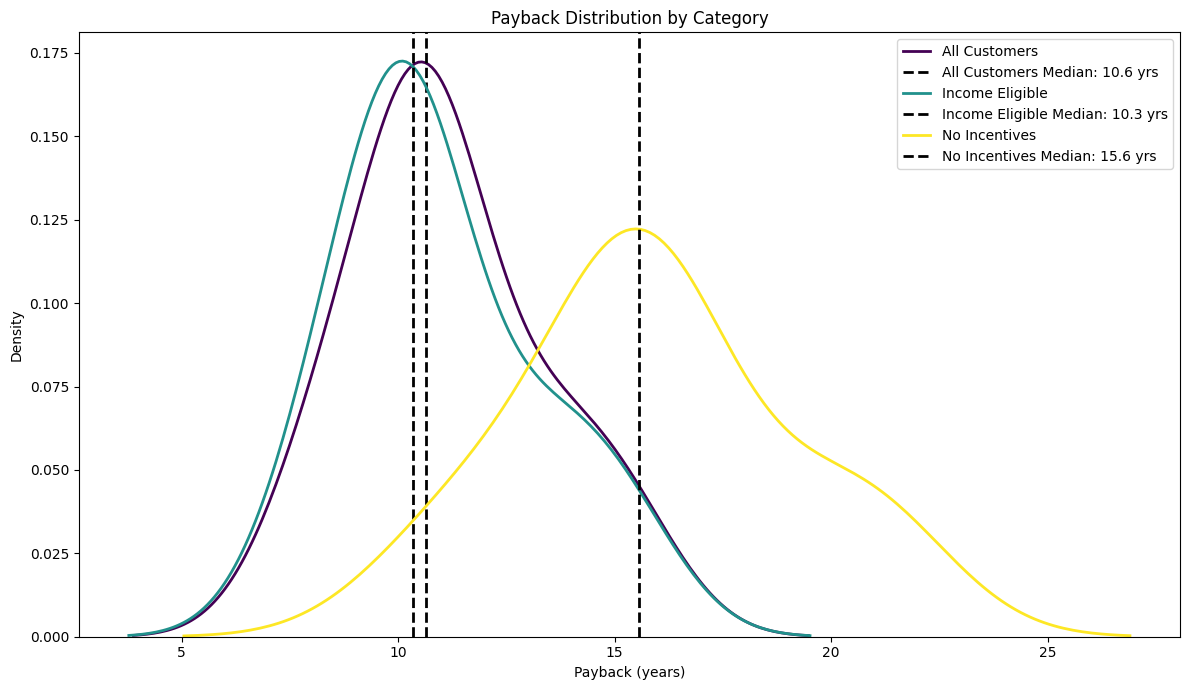

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

paybacks = retrofit_result_costs_check.paybacks[
    ["payback.AllCustomers", "payback.IncomeEligible", "payback.NoIncentives"]
]

labels = [
    "All Customers",
    "Income Eligible",
    "No Incentives",
]
# Use the viridis color scheme for three categories
viridis = plt.cm.get_cmap("viridis", 3)
colors = [viridis(i) for i in range(3)]

plt.figure(figsize=(12, 7))

# Plot histogram and KDE for each payback category
for i, col in enumerate(paybacks.columns):
    sns.kdeplot(
        paybacks[col].dropna(),
        color=colors[i],
        label=f"{labels[i]}",
        linewidth=2,
    )
    # Add median line
    median = paybacks[col].median()
    plt.axvline(
        median,
        color="black",
        linestyle="--",
        linewidth=2,
        label=f"{labels[i]} Median: {median:.1f} yrs",
    )

plt.xlabel("Payback (years)")
plt.ylabel("Density")
plt.title("Payback Distribution by Category")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
retrofit_result_costs_check.costs_summary

,cost.Heating.ASHPHeating,cost.Thermostat.Controls,cost.Cooling.ASHPCooling,cost.Windows.DoublePaneLowE,cost.Lighting.LED,cost.Total,cost.BasementWallsInsulation,cost.OnsiteSolar,cost.DHW,cost.BasementCeilingInsulation,...,net_cost.Windows.DoublePaneLowE.AllCustomers,net_cost.Thermostat.Controls.AllCustomers,net_cost.Total.AllCustomers,net_cost.Thermostat.AllCustomers,net_cost.Heating.AllCustomers,net_cost.Windows.AllCustomers,net_cost.DHW.AllCustomers,payback.IncomeEligible,payback.AllCustomers,payback.NoIncentives
mean,12161.459476,505.910883,333.924731,25938.986567,3104.079177,42044.360835,0.0,0.0,0.0,0.0,...,25338.986567,405.910883,29576.707678,0.0,0.0,0.0,0.0,10.977852,11.163064,15.919831
std,804.983880,19.882548,12.192222,3450.995396,154.616456,3280.560275,0.0,0.0,0.0,0.0,...,3450.995396,19.882548,3330.686837,0.0,0.0,0.0,0.0,2.247674,2.204784,3.104109
min,10788.332703,470.109487,312.624404,22039.960335,2903.378093,38058.990532,0.0,0.0,0.0,0.0,...,21439.960335,370.109487,25358.990532,0.0,0.0,0.0,0.0,8.030824,8.055792,10.924124
5%,11023.639364,479.583961,317.519079,22177.103380,2927.377242,38502.681994,0.0,0.0,0.0,0.0,...,21577.103380,379.583961,25912.491049,0.0,0.0,0.0,0.0,8.331616,8.359315,11.614488
10%,11258.946025,489.058436,322.413754,22314.246426,2951.376391,38946.373457,0.0,0.0,0.0,0.0,...,21714.246426,389.058436,26465.991566,0.0,0.0,0.0,0.0,8.632407,8.662838,12.304851
25%,11774.137885,502.120572,326.219528,22919.801474,2991.180831,39772.805871,0.0,0.0,0.0,0.0,...,22319.801474,402.120572,27072.805871,0.0,0.0,0.0,0.0,10.055326,10.513796,14.930576
50%,12103.413809,505.423059,333.684179,24919.787536,3063.346787,40532.824272,0.0,0.0,0.0,0.0,...,24319.787536,405.423059,28177.206075,0.0,0.0,0.0,0.0,10.346851,10.639849,15.558568
75%,12803.695920,509.691679,343.673494,29054.705115,3212.768817,45456.824971,0.0,0.0,0.0,0.0,...,28454.705115,409.691679,33080.646738,0.0,0.0,0.0,0.0,12.062153,12.130993,16.914530
90%,13115.780716,516.371914,347.658974,30365.426770,3274.405705,46125.380916,0.0,0.0,0.0,0.0,...,29765.426770,416.371914,33555.307202,0.0,0.0,0.0,0.0,13.969870,14.021417,20.445424
95%,13227.055463,533.277638,349.187276,30550.603235,3326.906439,46453.668255,0.0,0.0,0.0,0.0,...,29950.603235,433.277638,33822.446057,0.0,0.0,0.0,0.0,14.614281,14.662899,20.737080


In [8]:
retrofit_result_costs_check.costs[
    ["incentive.Total.IncomeEligible", "incentive.Total.AllCustomers"]
]

,incentive.Total.IncomeEligible,incentive.Total.AllCustomers
0,12792.370682,12692.370682
1,13133.942739,12700.000000
2,11588.332703,11488.332703
3,12628.611905,12528.611905
4,13891.052994,12700.000000
5,13014.456937,12700.000000
6,13760.280314,12700.000000
7,12111.236394,12011.236394
8,12555.979879,12455.979879
9,14138.330210,12700.000000


/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_15828/1831673368.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_15828/1831673368.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_15828/1831673368.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/zdf818b17xvgbgj_4z2v4tgm0000gn/T/ipykernel_15828/1831673368.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(costs_df[col], fill=True, ax=ax)
/var/folders/zf/

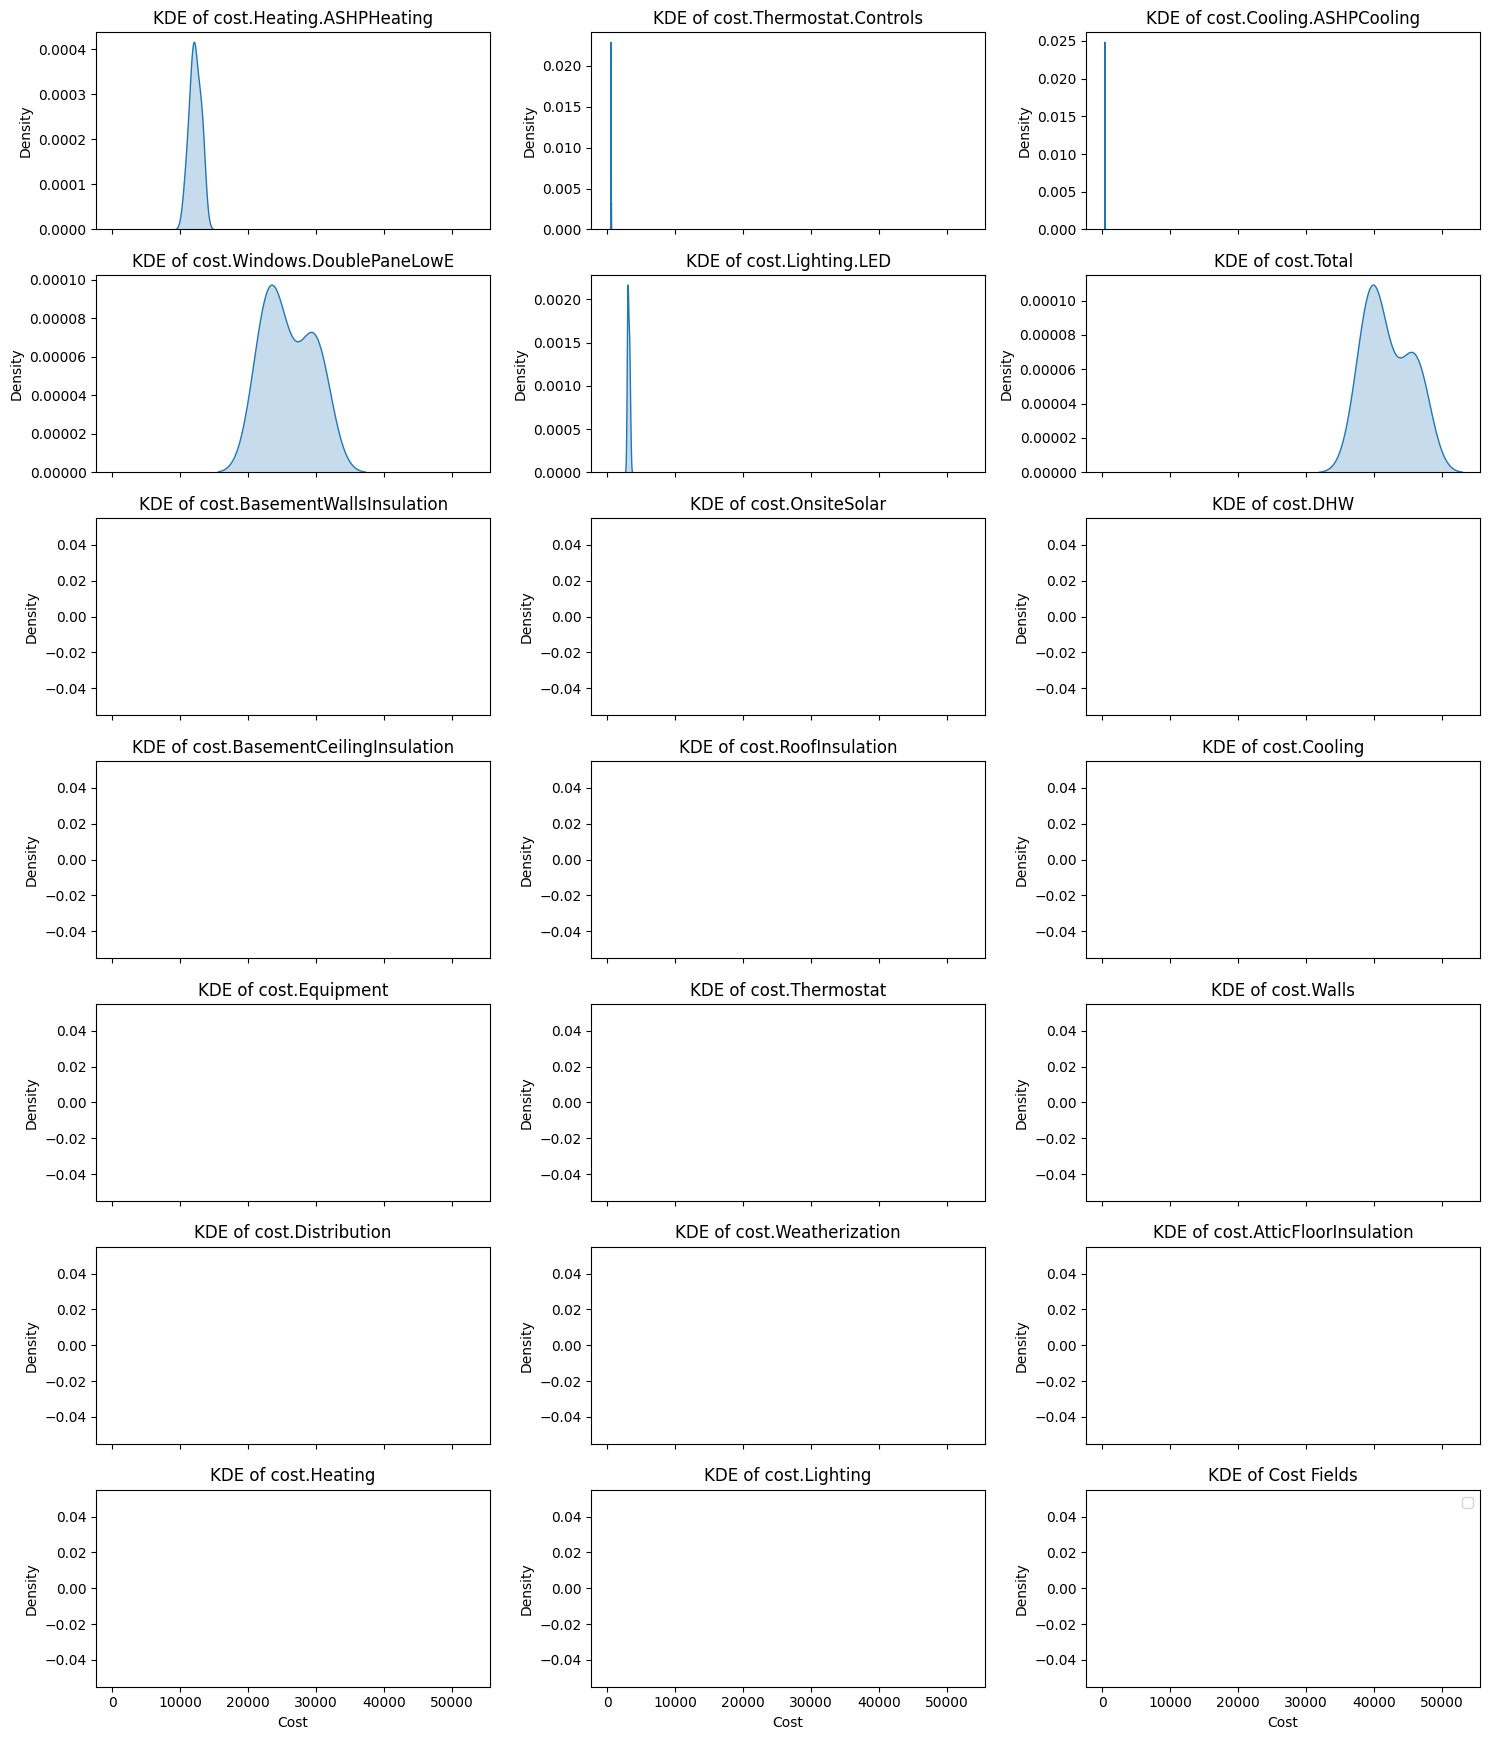

In [ ]:
# Select all columns that start with "cost." (excluding incentives, net_cost, payback, etc.)
cost_columns = [
    col for col in retrofit_result_costs_check.costs.columns if col.startswith("cost.")
]
cost_columns = list(dict.fromkeys(cost_columns))

costs_df = retrofit_result_costs_check.costs[cost_columns]
# Remove duplicate columns from costs_df if any
costs_df = costs_df.loc[:, ~costs_df.columns.duplicated()]


ncols = 3
nrows = (len(cost_columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 2.5 * nrows), sharex=True)
axes = axes.flatten()
if len(cost_columns) == 1:
    axes = [axes]
for ax, col in zip(axes, cost_columns, strict=False):
    sns.kdeplot(costs_df[col], fill=True, ax=ax)
    ax.set_title(f"KDE of {col}")
    ax.set_xlabel("Cost")
    ax.set_ylabel("Density")
plt.tight_layout()

plt.title("KDE of Cost Fields")
plt.xlabel("Cost")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

## Test solar functioanlity

In [ ]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
)

results = savings_spec.run(n=10)
original_results = results["original"]
new_results = results["upgraded"]
delta_results = results["delta"]
retrofit_result = results["retrofit"]

In [38]:
original_results.disaggregations

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              51.449091          16.440532  17.866519  28.733074  14.096112   
1              50.862264          16.440550  17.866519  24.837307  14.096142   
2              51.964281          16.440532  17.866499  30.472914  14.096112   
3              52.855761          16.440532  17.866499  30.444410  14.096112   
4              46.299058          16.440536  17.866519  28.005408  14.096112   
5              47.491137          16.440550  17.866545  22.463915  14.096841   
6              53.780527          16.440532  17.866519  25.966178  14.096142   
7              50.021869          16.440532  17.866545  22.614237  14.096841   
8              52.300541          16.440532  17.866545  22.995076  14.096841   
9              51.652059          16.440550  17.866519  28.070798  14.096112   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              21.273685          39.435212  17.866519  45.153080  14.096112   
1              19.736858          27.465830  17.866519  37.921021  14.096142   
2              26.042974          36.232064  17.866499  61.401739  14.096112   
3              21.184526          39.868414  17.866499  47.280477  14.096112   
4              17.866864          27.890758  17.866519  43.452924  14.096112   
5              18.617844          37.716008  17.866545  36.586779  14.096841   
6              25.721879          33.802458  17.866519  44.452314  14.096142   
7              24.075806          35.783839  17.866545  42.066634  14.096841   
8              19.287646          38.814289  17.866545  49.778195  14.096841   
9              21.528224          37.228312  17.866519  39.510241  14.096112   

Normalization  ...              Gross                                \
Dataset        ...    EndUseEmissions                                 
Segment        ... Domestic Hot Water Equipment   Heating  Lighting   
0              ...           2.524573  1.371395  2.890620  1.081986   
1              ...           1.576708  1.450988  2.176901  1.144786   
2              ...           2.296612  1.412570  3.892021  1.114473   
3              ...           2.408790  1.361453  2.856616  1.074144   
4              ...           1.800970  1.451793  2.805855  1.145418   
5              ...           2.387052  1.361450  2.315583  1.074195   
6              ...           2.249654  1.388380  2.958434  1.095389   
7              ...           2.262571  1.310525  2.659825  1.034014   
8              ...           2.181568  1.335665  2.797797  1.053850   
9              ...           2.263325  1.282771  2.402056  1.012065   

Normalization                                                               
Dataset           FuelCost                   FuelEmissions                  
Segment        Electricity   NaturalGas  Oil   Electricity NaturalGas  Oil  
0              4074.662082  1757.376177  0.0      4.086302   5.415193  0.0  
1              4005.810977  1191.515840  0.0      4.198658   3.753609  0.0  
2              4451.355186  1837.506669  0.0      4.586065   6.188633  0.0  
3              4186.017971  1106.999077  0.0      4.049889   5.265407  0.0  
4              4253.319177  1430.473352  0.0      4.049033   4.606826  0.0  
5              3296.212241  1393.151700  0.0      3.854345   4.702635  0.0  
6              4431.081095  1130.493131  0.0      4.482576   5.208088  0.0  
7              4420.515075  1261.435102  0.0      4.110519   4.922397  0.0  
8              4073.430511  1614.617720  0.0      3.831418   4.979365  0.0  
9              4072.816544  1353.996801  0.0      3.840509   4.665381 

In [ ]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "ExistingSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=10,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "SolarPV",
    },
)

results_with_solar = savings_spec.run(n=10)
existing_solar_results = results_with_solar["original"]
new_results = results_with_solar["upgraded"]
delta_results = results_with_solar["delta"]
retrofit_result = results_with_solar["retrofit"]

In [43]:
existing_solar_results.disaggregations

Normalization Normalized                                                      \
Dataset              Raw                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              51.449091          16.440532  17.866519  28.733074  14.096112   
1              50.862264          16.440550  17.866519  24.837307  14.096142   
2              51.964281          16.440532  17.866499  30.472914  14.096112   
3              52.855761          16.440532  17.866499  30.444410  14.096112   
4              46.299058          16.440536  17.866519  28.005408  14.096112   
5              47.491137          16.440550  17.866545  22.463915  14.096841   
6              53.780527          16.440532  17.866519  25.966178  14.096142   
7              50.021869          16.440532  17.866545  22.614237  14.096841   
8              52.300541          16.440532  17.866545  22.995076  14.096841   
9              51.652059          16.440550  17.866519  28.070798  14.096112   

Normalization                                                                 \
Dataset           EndUse                                                       
Segment          Cooling Domestic Hot Water  Equipment    Heating   Lighting   
0              21.273685          39.435212  17.866519  45.153080  14.096112   
1              19.736858          27.465830  17.866519  37.921021  14.096142   
2              26.042974          36.232064  17.866499  61.401739  14.096112   
3              21.184526          39.868414  17.866499  47.280477  14.096112   
4              17.866864          27.890758  17.866519  43.452924  14.096112   
5              18.617844          37.716008  17.866545  36.586779  14.096841   
6              25.721879          33.802458  17.866519  44.452314  14.096142   
7              24.075806          35.783839  17.866545  42.066634  14.096841   
8              19.287646          38.814289  17.866545  49.778195  14.096841   
9              21.528224          37.228312  17.866519  39.510241  14.096112   

Normalization  ...              Gross                                \
Dataset        ...    EndUseEmissions                                 
Segment        ... Domestic Hot Water Equipment   Heating  Lighting   
0              ...           2.524573  0.059364  2.890620  0.046836   
1              ...           1.576708  0.113581  2.176901  0.089612   
2              ...           2.296612  0.633296  3.892021  0.499651   
3              ...           2.408790  0.187538  2.856616  0.147962   
4              ...           1.800970  0.157251  2.805855  0.124066   
5              ...           2.387052  0.110299  2.315583  0.087027   
6              ...           2.249654  0.095968  2.958434  0.075716   
7              ...           2.262571  0.562177  2.659825  0.443562   
8              ...           2.181568  0.281400  2.797797  0.222027   
9              ...           2.263325  0.142578  2.402056  0.112489   

Normalization                                                               
Dataset           FuelCost                   FuelEmissions                  
Segment        Electricity   NaturalGas  Oil   Electricity NaturalGas  Oil  
0               176.380177  1757.376177  0.0      0.176884   5.415193  0.0  
1               313.568017  1191.515840  0.0      0.328664   3.753609  0.0  
2              1995.671566  1837.506669  0.0      2.056066   6.188633  0.0  
3               576.617541  1106.999077  0.0      0.557866   5.265407  0.0  
4               460.699326  1430.473352  0.0      0.438572   4.606826  0.0  
5               267.045894  1393.151700  0.0      0.312264   4.702635  0.0  
6               306.286013  1130.493131  0.0      0.309845   5.208088  0.0  
7              1896.273088  1261.435102  0.0      1.763294   4.922397  0.0  
8               858.197128  1614.617720  0.0      0.807209   4.979365  0.0  
9               452.686593  1353.996801  0.0      0.426866   4.665381 

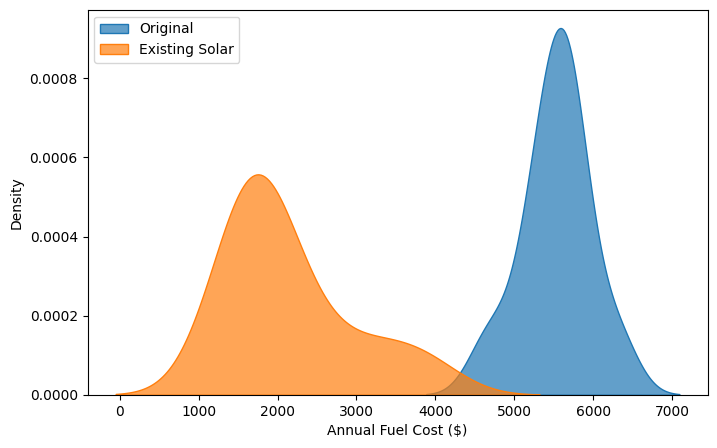

In [45]:
import matplotlib.pyplot as plt

# Extract fuel cost for both cases
original_fuel_cost = original_results.disaggregations["Gross"]["FuelCost"].sum(axis=1)
existing_solar_fuel_cost = existing_solar_results.disaggregations["Gross"][
    "FuelCost"
].sum(axis=1)

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(original_fuel_cost, fill=True, label="Original", alpha=0.7)
sns.kdeplot(existing_solar_fuel_cost, fill=True, label="Existing Solar", alpha=0.7)
plt.xlabel("Annual Fuel Cost ($)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [62]:
# check the metadtaa columns
# View all incentives in the costs DataFrame
incentive_columns = [
    col
    for col in retrofit_result_costs_check.costs.columns
    if "incentive" in col.lower()
]
retrofit_result_costs_check.costs[incentive_columns]

,incentive.Heating.ASHPHeating.IncomeEligible,incentive.Windows.DoublePaneLowE.IncomeEligible,incentive.Thermostat.Controls.IncomeEligible,incentive.Total.IncomeEligible,incentive.metadata.IncomeEligible,incentive.DHW.IncomeEligible,incentive.Thermostat.IncomeEligible,incentive.Windows.IncomeEligible,incentive.Heating.IncomeEligible,incentive.Heating.ASHPHeating.AllCustomers,incentive.Windows.DoublePaneLowE.AllCustomers,incentive.Thermostat.Controls.AllCustomers,incentive.Total.AllCustomers,incentive.metadata.AllCustomers,incentive.DHW.AllCustomers,incentive.Thermostat.AllCustomers,incentive.Windows.AllCustomers,incentive.Heating.AllCustomers,payback.no_incentives
0,11573.472283,600.0,200.0,12373.472283,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,11573.472283,600.0,100.0,12273.472283,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,16.869397
1,12524.217196,600.0,200.0,13324.217196,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,12000.000000,600.0,100.0,12700.000000,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,15.891618
2,10738.054338,600.0,200.0,11538.054338,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,10738.054338,600.0,100.0,11438.054338,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,11.321111
3,12221.345504,600.0,200.0,13021.345504,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,12000.000000,600.0,100.0,12700.000000,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,20.490477
4,13284.291912,600.0,200.0,14084.291912,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,12000.000000,600.0,100.0,12700.000000,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,15.785850
5,12042.383370,600.0,200.0,12842.383370,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,12000.000000,600.0,100.0,12700.000000,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,16.186021
6,11225.942389,600.0,200.0,12025.942389,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,11225.942389,600.0,100.0,11925.942389,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,13.629933
7,12919.815275,600.0,200.0,13719.815275,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,12000.000000,600.0,100.0,12700.000000,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,13.530781
8,12131.355036,600.0,200.0,12931.355036,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,12000.000000,600.0,100.0,12700.000000,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,21.716886
9,13233.235457,600.0,200.0,14033.235457,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,12000.000000,600.0,100.0,12700.000000,"[{'trigger': 'Heating', 'final': 'ASHPHeating'...",0,0,0,0,16.400298


# Compare upgraded solar

In [ ]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "LowSolarPV",
    },
)

results_with_low_solar = savings_spec.run(n=10)
original_results_with_low_solar = results_with_low_solar["original"]
new_results_with_low_solar = results_with_low_solar["upgraded"]
delta_results_with_low_solar = results_with_low_solar["delta"]
retrofit_result_with_low_solar = results_with_low_solar["retrofit"]

In [ ]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "MedSolarPV",
    },
)

results_with_med_solar = savings_spec.run(n=10)
original_results_with_med_solar = results_with_med_solar["original"]
new_results_with_med_solar = results_with_med_solar["upgraded"]
delta_results_with_med_solar = results_with_med_solar["delta"]
retrofit_result_with_med_solar = results_with_med_solar["retrofit"]

In [ ]:
# Existing Solar
lat = 42.3601
lon = -71.0589
short_edge = 12
long_edge = 12
num_floors = 2
x_0 = 5
y_0 = 0
x_1 = x_0 + short_edge
y_1 = y_0 + long_edge


spec = SBEMInferenceRequestSpec(
    lat=lat,
    lon=lon,
    rotated_rectangle=f"POLYGON (({x_0} {y_0}, {x_0} {y_1}, {x_1} {y_1}, {x_1} {y_0}, {x_0} {y_0}))",
    neighbor_polys=["POLYGON ((-10 0, -10 10, -5 10, -5 0, -10 0))"],
    neighbor_floors=[3],
    short_edge=short_edge,
    long_edge=long_edge,
    num_floors=num_floors,
    orientation=0.000,
    basement="none",
    attic="none",
    semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "NoSolarPV",
    },
    county="Middlesex",
    source_experiment="ma-webapp/v4-20250814-163347/iter-003/train/0/models",
    current_solar_size_kW=0.0,
    # upgraded_solar_coverage=0.3,
    actual_conditioned_area_m2=250,
)

# results = spec.run(n=1000)
savings_spec = SBEMInferenceSavingsRequestSpec(
    original=spec,
    upgraded_semantic_field_context={
        # constant
        "Region": "MA",
        "Typology": "SFH",
        "Age_bracket": "btw_1975_2003",
        # sys
        "DHW": "NaturalGasDHW",
        "Cooling": "ACCentral",
        "Heating": "NaturalGasHeating",
        # "Distribution": "AirDuctsConditionedUninsulated",
        "Distribution": "AirDuctsUninsulated",
        # equip/lights/etc
        "Equipment": "LowEfficiencyEquipment",
        "Lighting": "NoLED",
        "Thermostat": "NoControls",
        # attics
        "AtticFloorInsulation": "NoInsulation",
        "AtticVentilation": "VentilatedAttic",
        # basement
        "BasementCeilingInsulation": "UninsulatedCeiling",
        "BasementWallsInsulation": "UninsulatedWalls",
        # env
        "GroundSlabInsulation": "UninsulatedGroundSlab",
        "RoofInsulation": "InsulatedRoof",
        "Walls": "SomeInsulationWalls",
        "Weatherization": "SomewhatLeakyEnvelope",
        # "Weatherization": "SomewhatLeakyEnvelope",
        "Windows": "SinglePane",
        "OnsiteSolar": "MaxSolarPV",
    },
)

results_with_high_solar = savings_spec.run(n=10)
original_results_with_high_solar = results_with_high_solar["original"]
new_results_with_high_solar = results_with_high_solar["upgraded"]
delta_results_with_high_solar = results_with_high_solar["delta"]
retrofit_result_with_high_solar = results_with_high_solar["retrofit"]

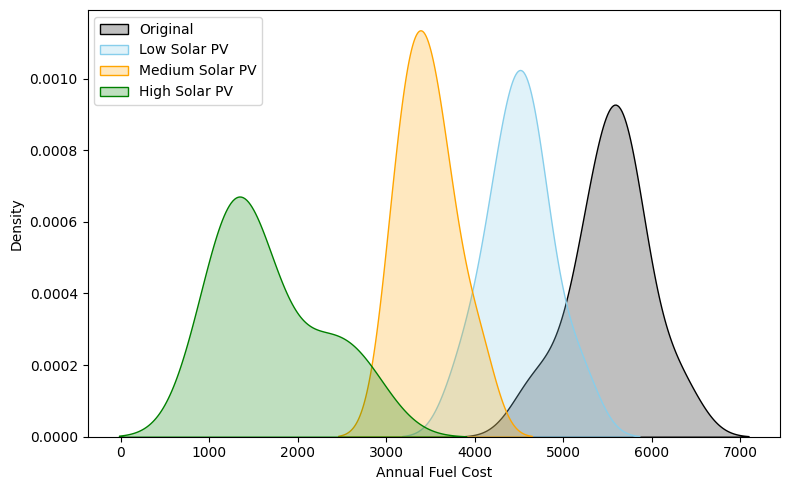

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get total fuel cost samples for each scenario
of_fuel_cost = original_results_with_high_solar.disaggregations["Gross"][
    "FuelCost"
].sum(axis=1)
fuel_cost_low = new_results_with_low_solar.disaggregations["Gross"]["FuelCost"].sum(
    axis=1
)
fuel_cost_med = new_results_with_med_solar.disaggregations["Gross"]["FuelCost"].sum(
    axis=1
)
fuel_cost_high = new_results_with_high_solar.disaggregations["Gross"]["FuelCost"].sum(
    axis=1
)

plt.figure(figsize=(8, 5))
sns.kdeplot(of_fuel_cost, label="Original", fill=True, color="black")
sns.kdeplot(fuel_cost_low, label="Low Solar PV", fill=True, color="skyblue")
sns.kdeplot(fuel_cost_med, label="Medium Solar PV", fill=True, color="orange")
sns.kdeplot(fuel_cost_high, label="High Solar PV", fill=True, color="green")
plt.xlabel("Annual Fuel Cost")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
retrofit_result_with_high_solar.costs

,cost.OnsiteSolar.MaxSolarPV,cost.Total,cost.Lighting,cost.BasementWallsInsulation,cost.Weatherization,cost.OnsiteSolar,cost.Walls,cost.Thermostat,cost.AtticFloorInsulation,cost.Cooling,...,net_cost.Windows.IncomeEligible,net_cost.Heating.IncomeEligible,net_cost.Total.AllCustomers,net_cost.DHW.AllCustomers,net_cost.Thermostat.AllCustomers,net_cost.Windows.AllCustomers,net_cost.Heating.AllCustomers,payback.IncomeEligible,payback.AllCustomers,payback.no_incentives
0,30203.957614,30203.957614,0,0,0,0,0,0,0,0,...,0,0,30203.957614,0,0,0,0,8.967613,8.967613,8.967613
1,27365.075746,27365.075746,0,0,0,0,0,0,0,0,...,0,0,27365.075746,0,0,0,0,6.831345,6.831345,6.831345
2,27589.152154,27589.152154,0,0,0,0,0,0,0,0,...,0,0,27589.152154,0,0,0,0,7.864167,7.864167,7.864167
3,35552.722824,35552.722824,0,0,0,0,0,0,0,0,...,0,0,35552.722824,0,0,0,0,8.493208,8.493208,8.493208
4,30176.498428,30176.498428,0,0,0,0,0,0,0,0,...,0,0,30176.498428,0,0,0,0,7.296586,7.296586,7.296586
5,41331.846865,41331.846865,0,0,0,0,0,0,0,0,...,0,0,41331.846865,0,0,0,0,12.539195,12.539195,12.539195
6,40918.443655,40918.443655,0,0,0,0,0,0,0,0,...,0,0,40918.443655,0,0,0,0,9.234415,9.234415,9.234415
7,41910.433094,41910.433094,0,0,0,0,0,0,0,0,...,0,0,41910.433094,0,0,0,0,12.032716,12.032716,12.032716
8,31482.369029,31482.369029,0,0,0,0,0,0,0,0,...,0,0,31482.369029,0,0,0,0,7.728711,7.728711,7.728711
9,34108.316560,34108.316560,0,0,0,0,0,0,0,0,...,0,0,34108.316560,0,0,0,0,8.374626,8.374626,8.374626


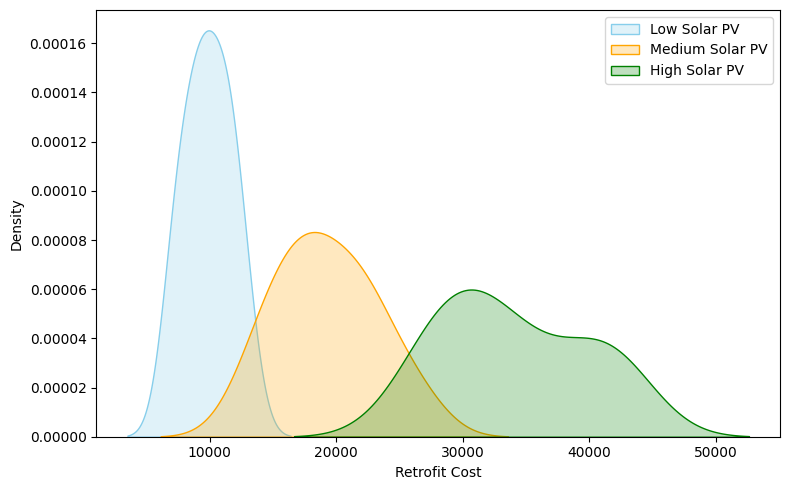

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get total fuel cost samples for each scenario
retrofit_costs_low = retrofit_result_with_low_solar.costs["cost.Total"]
retrofit_costs_med = retrofit_result_with_med_solar.costs["cost.Total"]
retrofit_costs_high = retrofit_result_with_high_solar.costs["cost.Total"]

plt.figure(figsize=(8, 5))
sns.kdeplot(retrofit_costs_low, label="Low Solar PV", fill=True, color="skyblue")
sns.kdeplot(retrofit_costs_med, label="Medium Solar PV", fill=True, color="orange")
sns.kdeplot(retrofit_costs_high, label="High Solar PV", fill=True, color="green")
plt.xlabel("Retrofit Cost")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()